In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.datasets import make_classification
import xgboost as xgb

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
X, y = make_classification(
    n_samples=5000, 
    n_features=1,
    n_informative=1, 
    n_redundant=0, 
    n_repeated=0,
    n_classes=2, 
    n_clusters_per_class=1,
    flip_y=0.0,
    weights=[.98,], 
    class_sep=0.3,
    random_state=2021
)

X_train_and_valid, X_test, y_train_and_valid, y_test = train_test_split(X, y, test_size=0.20, random_state=2023)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_and_valid, y_train_and_valid, test_size=0.20, random_state=2023)

In [3]:
X_valid.shape

(800, 1)

In [4]:
X_valid[y_valid==1].shape

(13, 1)

In [5]:
df = pd.concat((pd.DataFrame(X_train), pd.Series(y_train, name='target')), axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,3200.0,-0.280308,0.561272,-2.073653,-0.663276,-0.272696,0.105146,1.756664
target,3200.0,0.021250,0.144239,0.000000,0.000000,0.000000,0.000000,1.000000


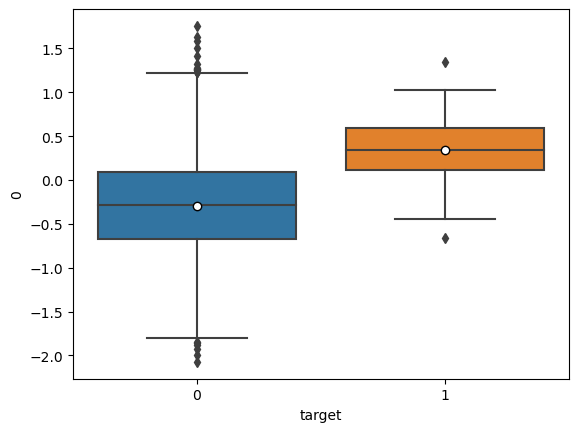

In [6]:
fig, ax = plt.subplots()
meanprops = {"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}
sns.boxplot(
        x='target', y=0, data=df, ax=ax,
        showmeans=True, meanprops=meanprops
)
fig.show()

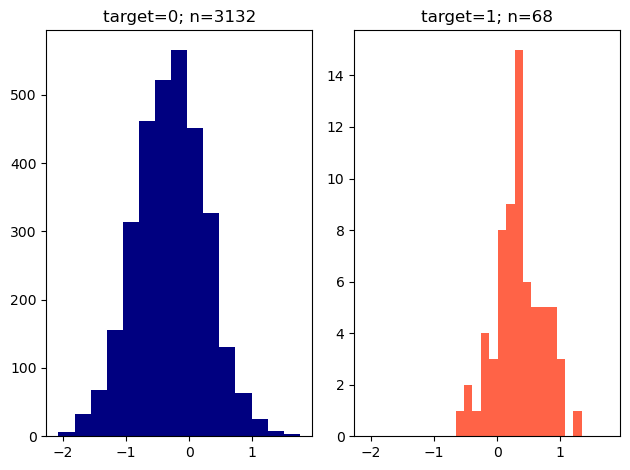

In [7]:
fig, axs = plt.subplots(1, 2, sharey=False, sharex=True, tight_layout=True)
colors = ['navy', 'tomato']
for target in np.unique(y): 
    x_vals = df.query(f'target==@target').filter([0])
    ax = axs[target]
    ax.hist(x_vals, bins=15, color=colors[target])
    ax.set_title(f'target={target}; n={len(x_vals)}')


In [8]:
model_dict = {
    0: LogisticRegression(random_state=11), 
    1: RandomForestClassifier(random_state=11), 
    2: xgb.XGBClassifier(objective="binary:logistic", random_state=11)
}



model: LogisticRegression(random_state=11)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       787
           1       0.00      0.00      0.00        13

    accuracy                           0.98       800
   macro avg       0.49      0.50      0.50       800
weighted avg       0.97      0.98      0.98       800



model: RandomForestClassifier(random_state=11)


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       787
           1       0.07      0.15      0.10        13

    accuracy                           0.95       800
   macro avg       0.53      0.56      0.54       800
weighted avg       0.97      0.95      0.96       800



model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_j

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       787
           1       0.00      0.00      0.00        13

    accuracy                           0.98       800
   macro avg       0.49      0.50      0.50       800
weighted avg       0.97      0.98      0.98       800



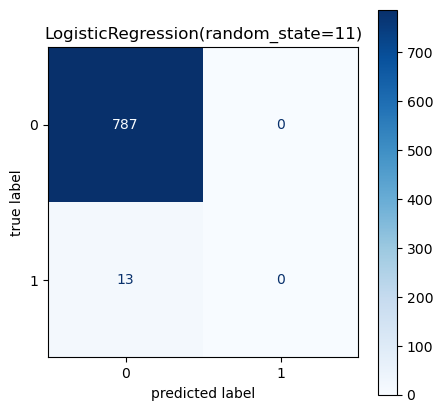

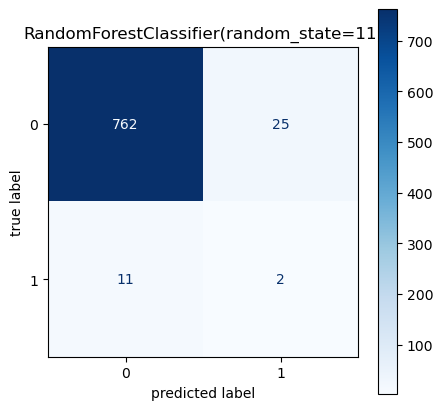

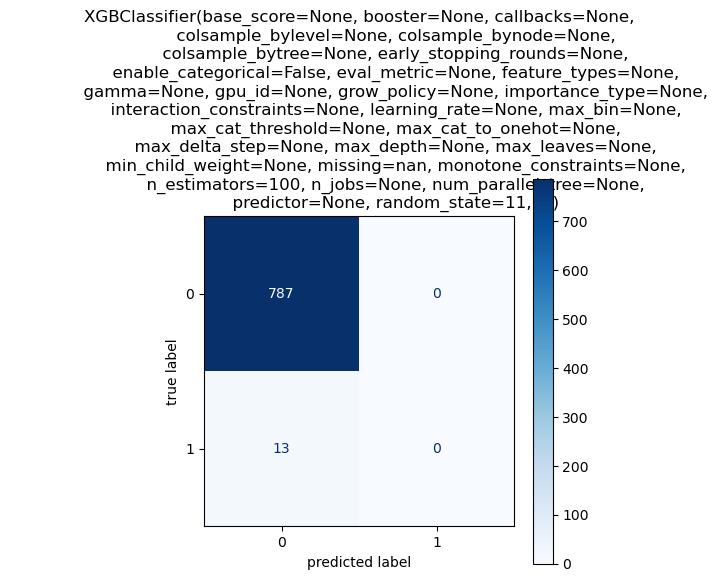

In [9]:
def train_model(model_num, X_train=X_train, y_train=y_train, X_valid=X_valid): 
    m = model_dict.get(model_num)
    m.fit(X_train, y_train)
    preds = m.predict(X_valid)
    return preds 

def evaluate_model(y, y_pred, model_desc=''): 
    cr = classification_report(y, y_pred)
    print(cr) 
    
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(5, 5))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    plt.title(f'{model_desc}')
    plt.xlabel("predicted label")
    plt.ylabel("true label")
    plt.plot()
    

def train_eval_pipeline(model_num, _X_train=X_train, _y_train=y_train, _X_valid=X_valid, _y_valid=y_valid): 
    model_desc = model_dict.get(model_num)
    print(f'\n\nmodel: {model_desc}')
    preds_valid = train_model(model_num, _X_train, _y_train, _X_valid)
    evaluate_model(_y_valid, preds_valid, model_desc)

for model in model_dict.keys(): 
    train_eval_pipeline(model)



model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=11, ...)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       981
           1       0.00      0.00      0.00        19

    accuracy                           0.98      1000
   macro avg       0.49

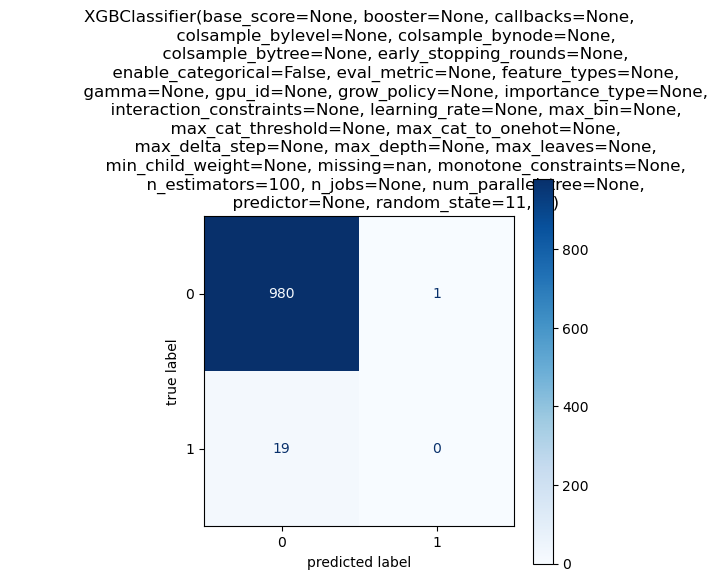

In [10]:
selected_model_num = 2
train_eval_pipeline(selected_model_num, X_train_and_valid, y_train_and_valid, X_test, y_test)